## Class Assignment

# Heart Failure Model



In [1]:
#importing libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output


In [2]:
heart_df = pd.read_csv("Heart Failure Dataset.csv")

In [3]:
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
heart_df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# EDA (Exploratory Data Analysis)

In [6]:
heart_df.shape

(299, 13)

In [7]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
heart_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Dataset description (understanding the dataset)

from above columns we can identify that there are 12 attributes and 1 target column (death_event)

1. Age - age of the individual.

2. anaemia - a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues(False-0, true-1)

3. creatinine_phosphokinase - level of the CPK enzyme in the blood (mcg/L)

4. diabetes - If the person has diabetes or not (0- False , 1- True)

5. ejection_fraction - refers to how well your left ventricle (or right ventricle) pumps blood with each heartbeat (percentage)

6. high blood pressure: if the patient has hypertension (0- false, 1-True)

7. platelets: platelets in the blood (kiloplatelets/mL)

8. serum creatinine: level of serum creatinine in the blood (mg/dL)

9. serum sodium:  level of serum sodium in the blood (mEq/L)

10. sex: 0-Female, 1- Male

11. smoking: 0-False, 1-True

12. time: follow-up period (days)

13. [target column] Death: do the person dies during the followup period.

the Objective here is to find out the solution or the behavior changes to be taken care to prevent the individual from suffering death from the top-most reason for the death(heart failure).

Dataset has no null values we can start with the analysis

Lets start with the Age

<AxesSubplot:>

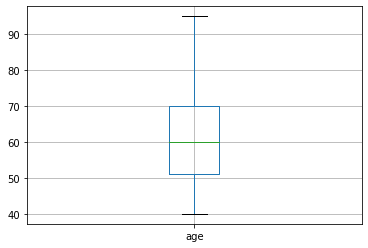

In [9]:
heart_df.boxplot('age')

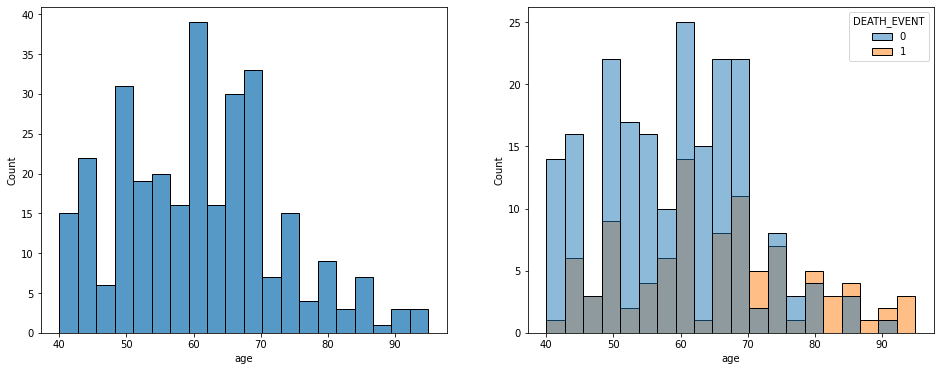

In [10]:
fig,axes = plt.subplots(1,2,figsize=[16,6])
sns.histplot(ax=axes[0],x='age',data=heart_df,bins=20)
sns.histplot(ax=axes[1],x='age',data=heart_df,bins=20,hue="DEATH_EVENT")
plt.show()

we can see that the most common age to identify the problem is around 60 - 70 also has the most deaths too, but can't be said that deaths are dependent on the Age.

Lets check lets check the relation of every feature using pair plot.

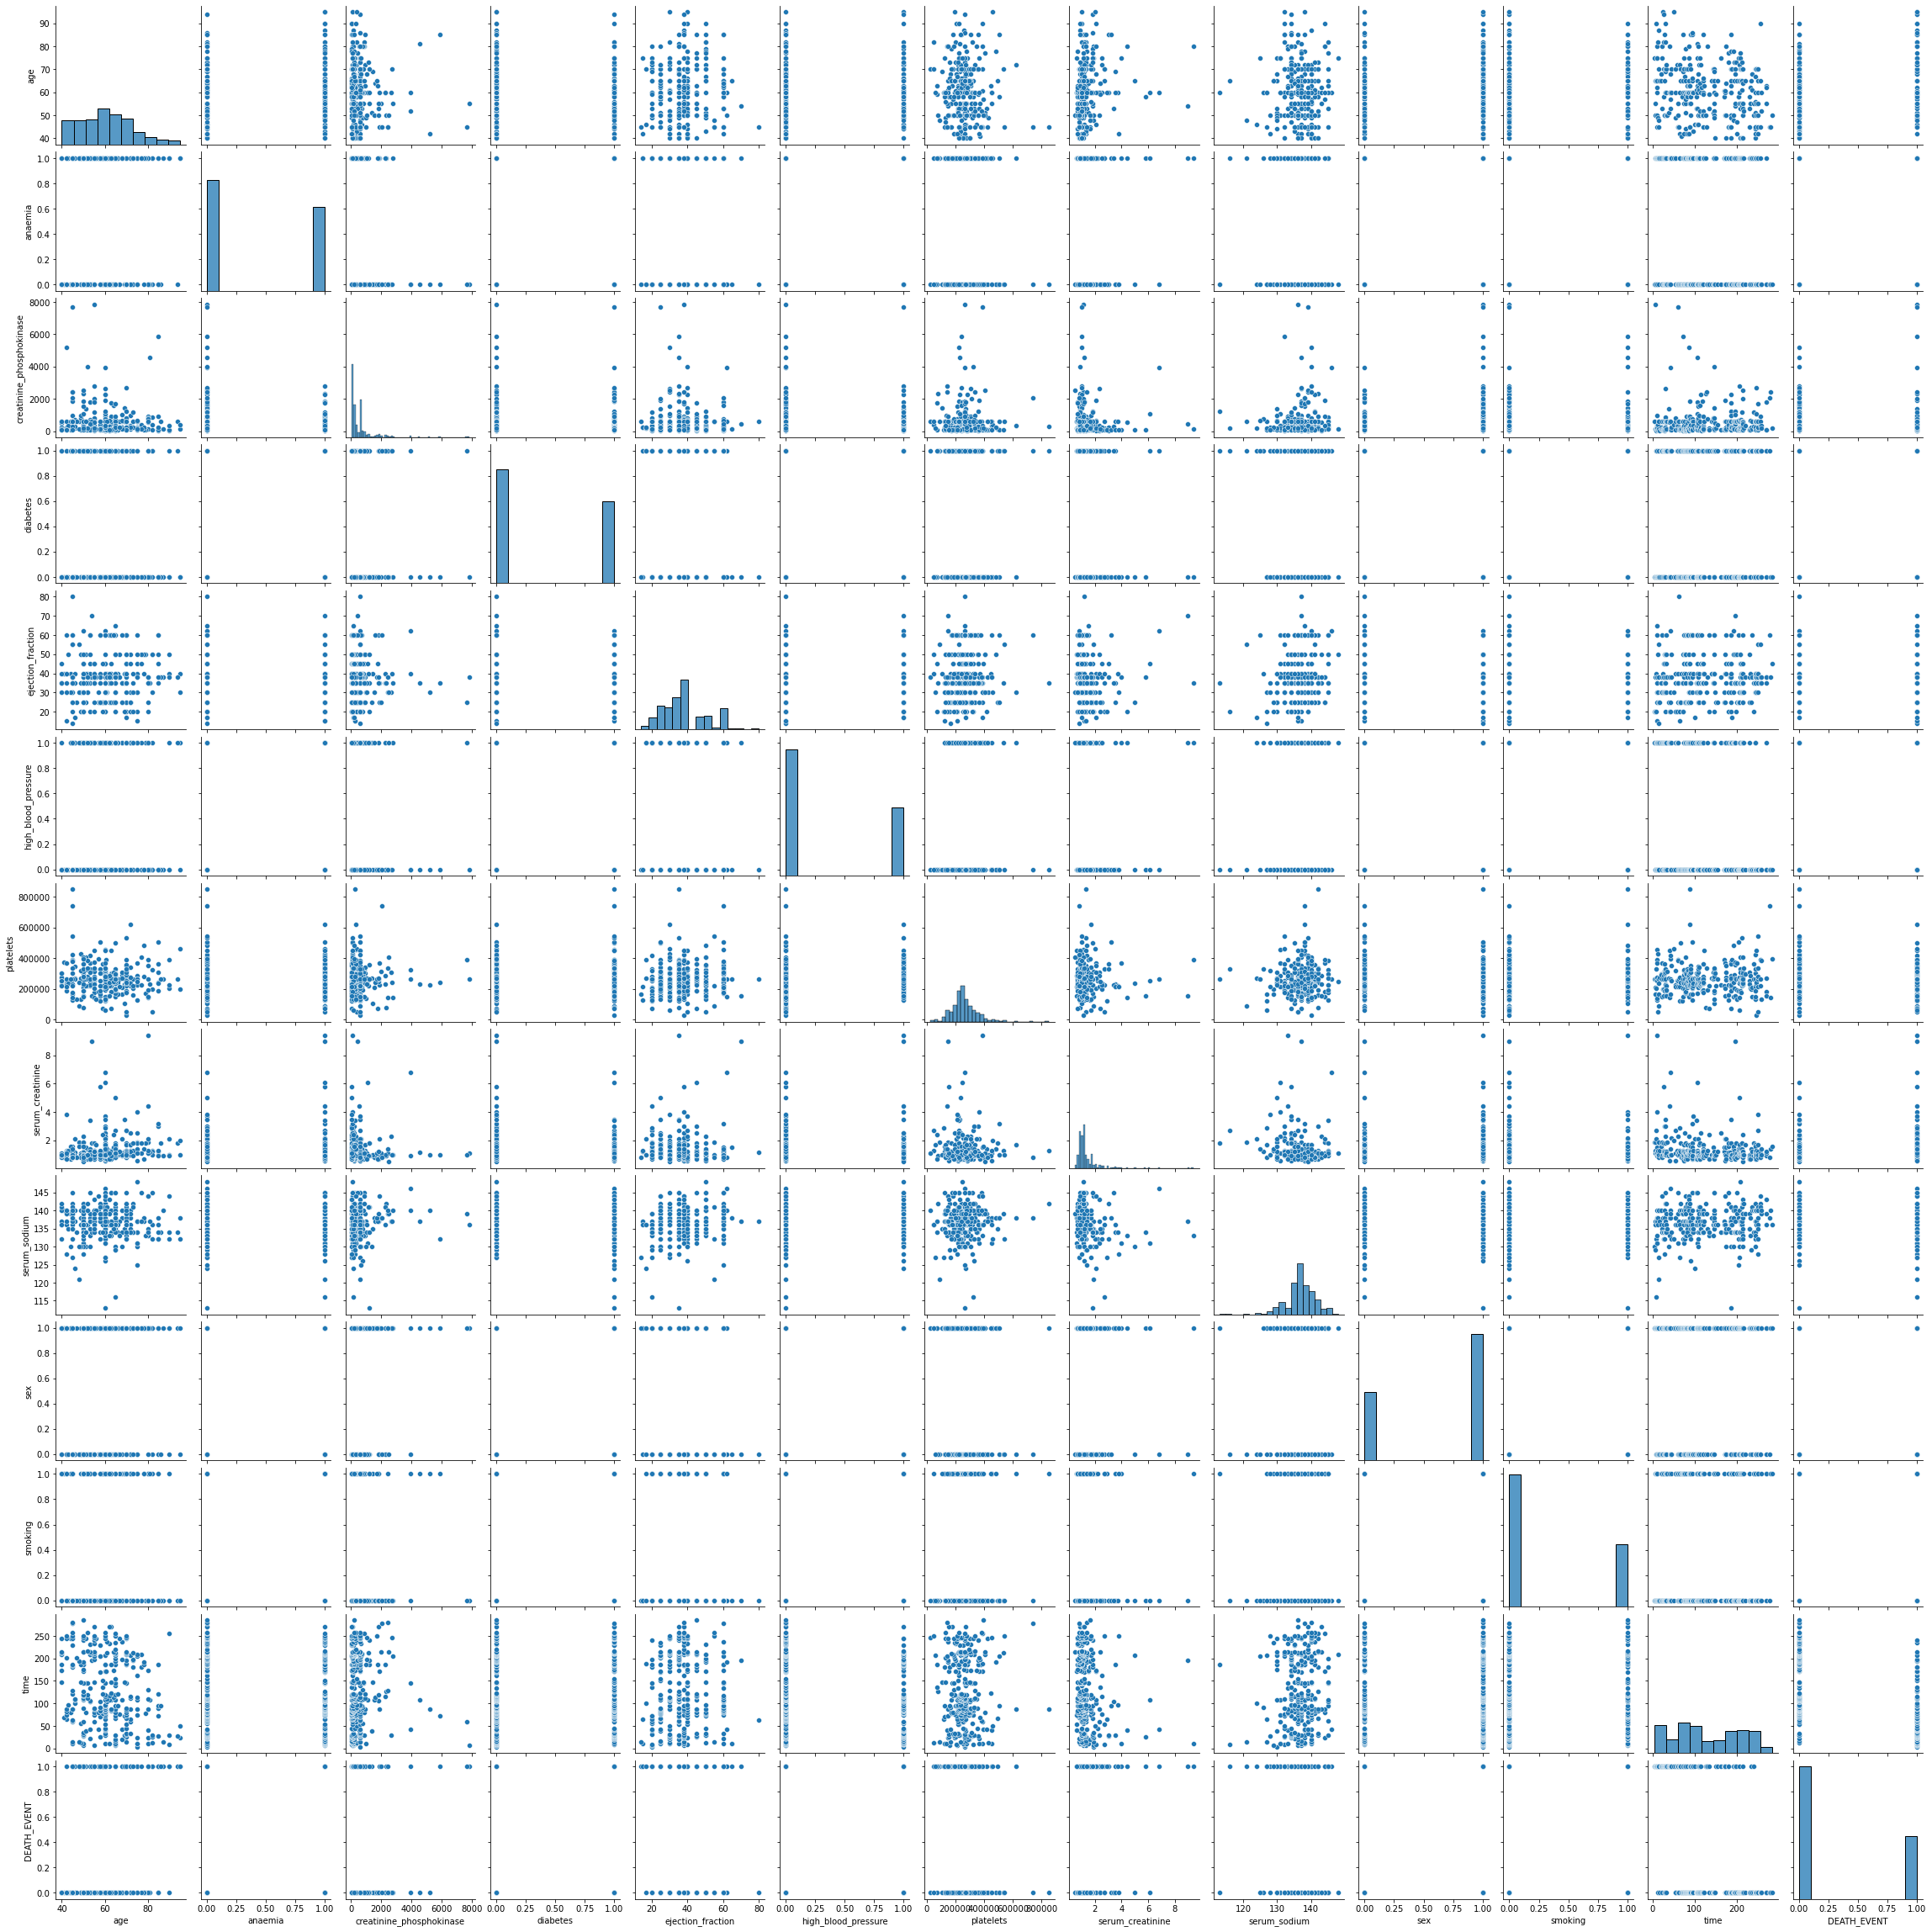

In [11]:
sns.pairplot(data=heart_df)

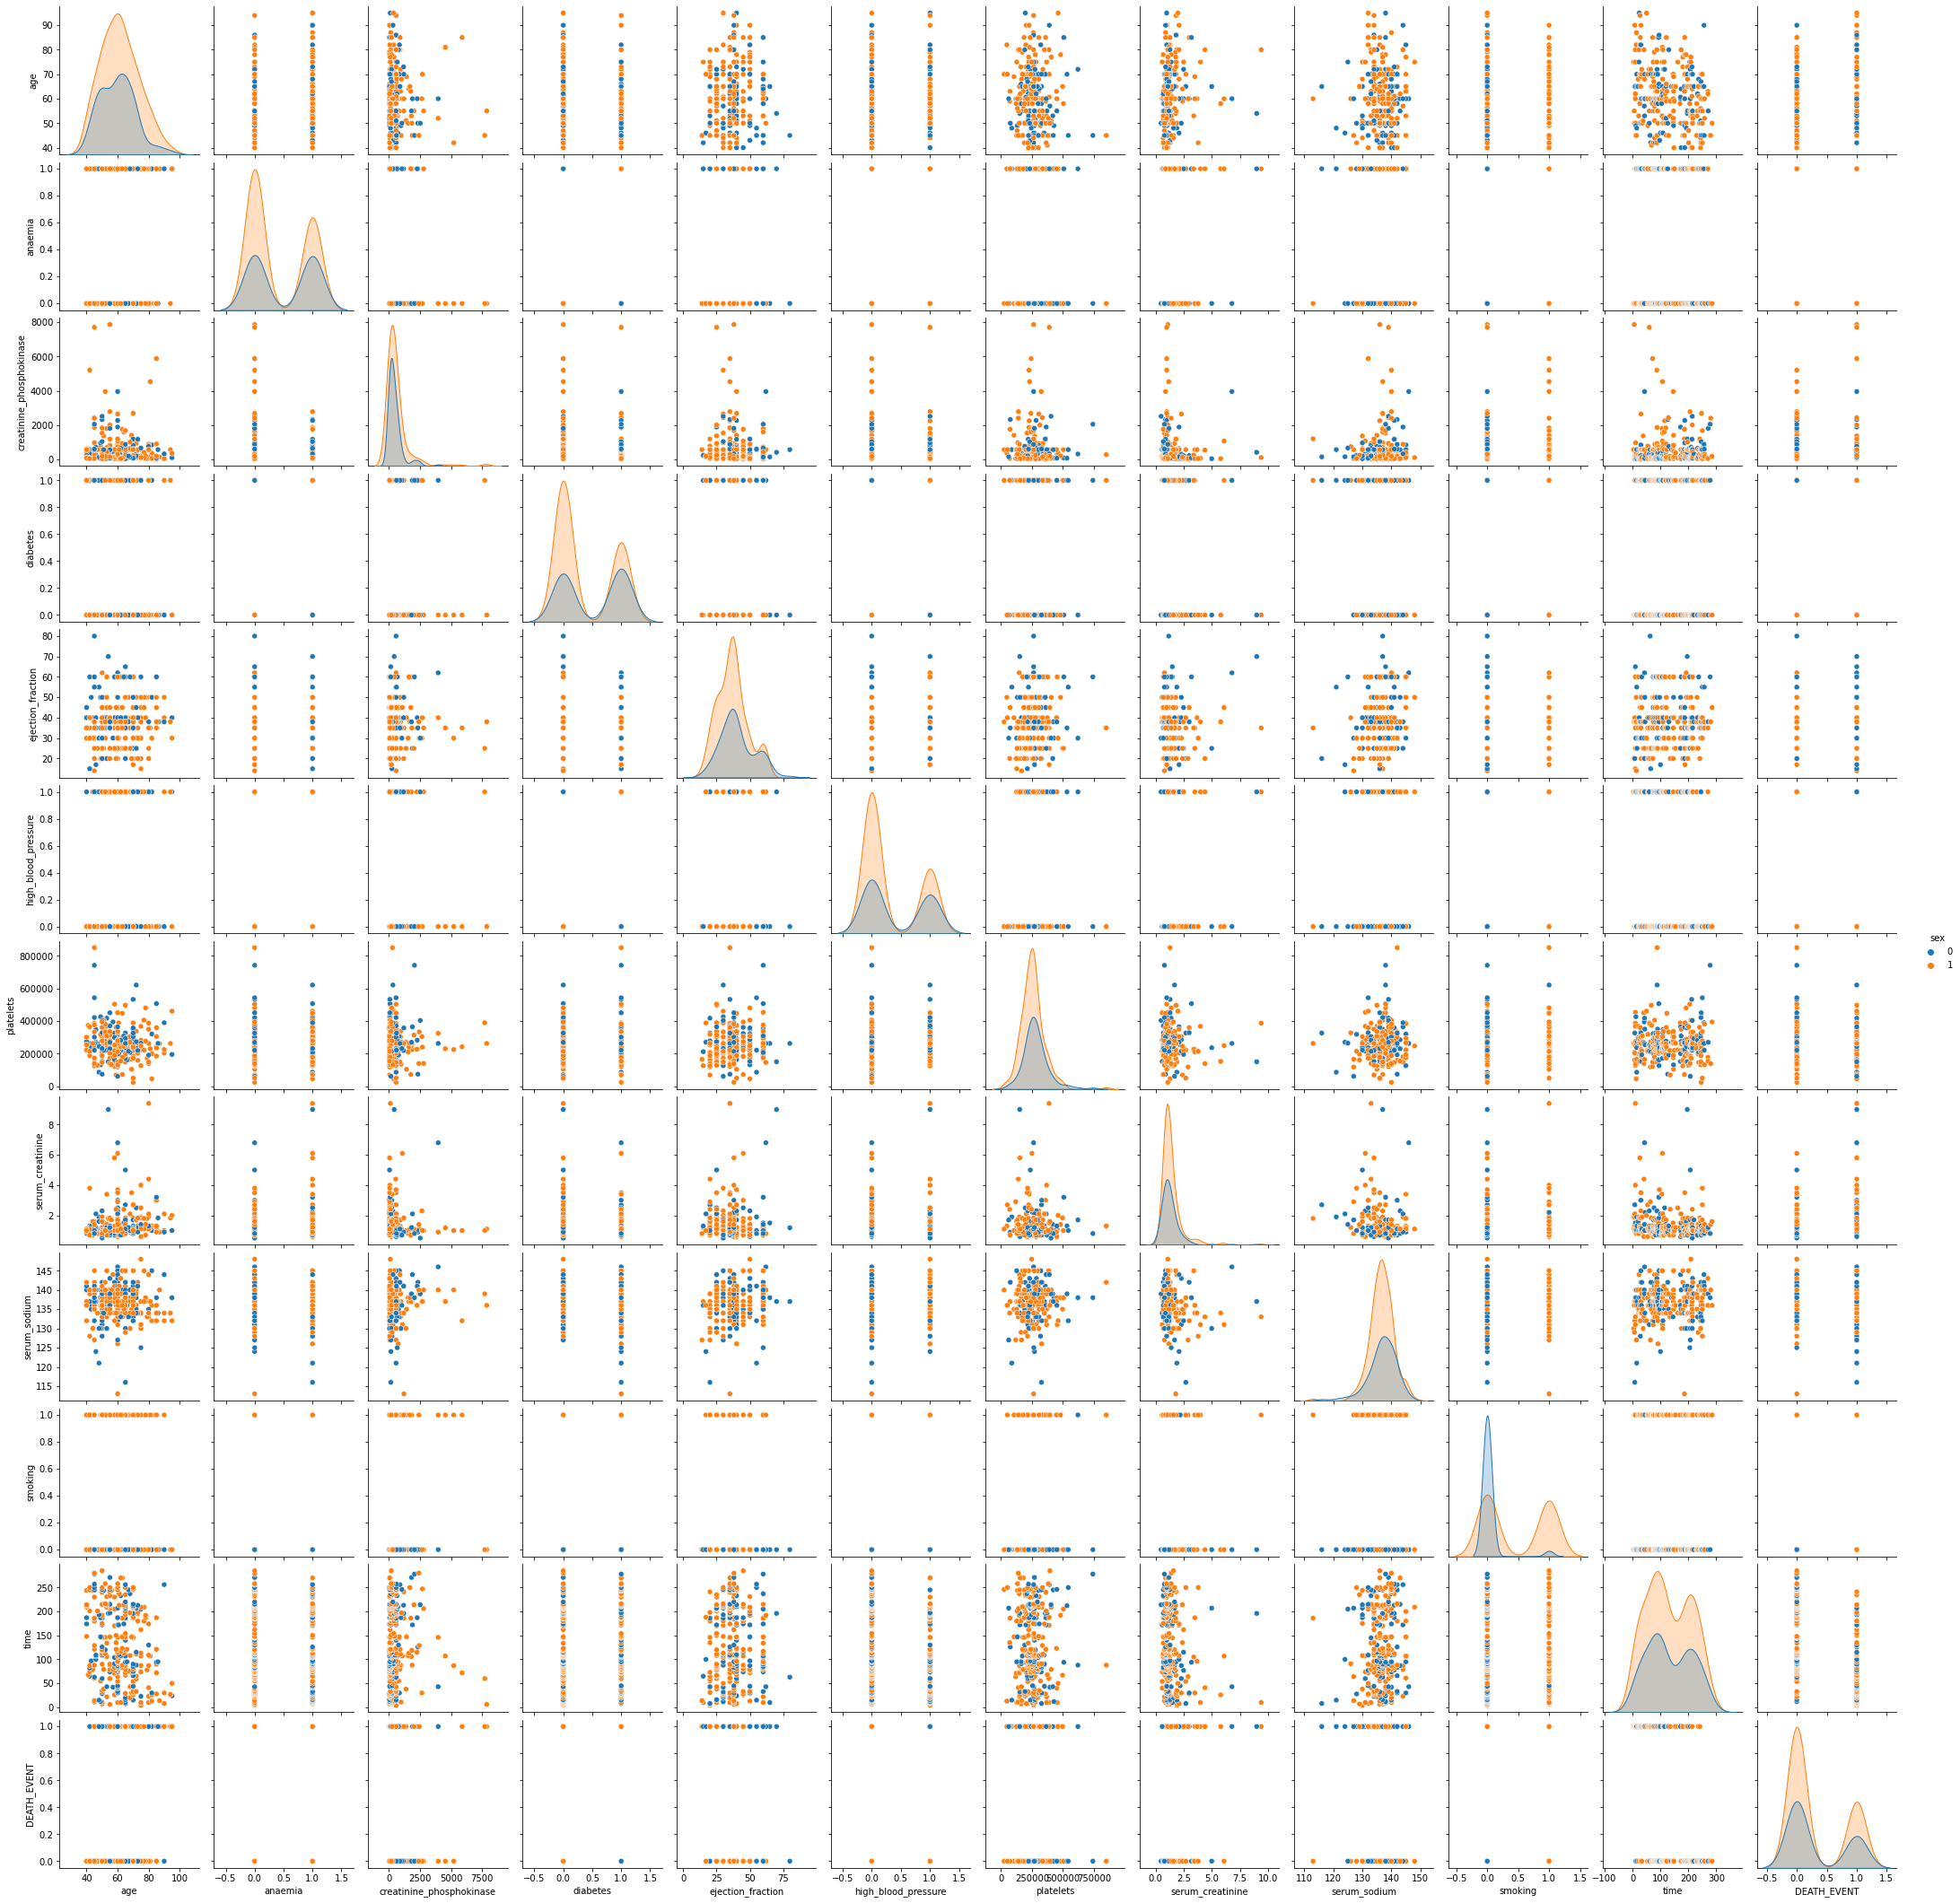

In [12]:
# with respect to sex

sns.pairplot(data=heart_df,hue='sex')

there doesn't seem much relation in the data

Plotting to see the correlation.

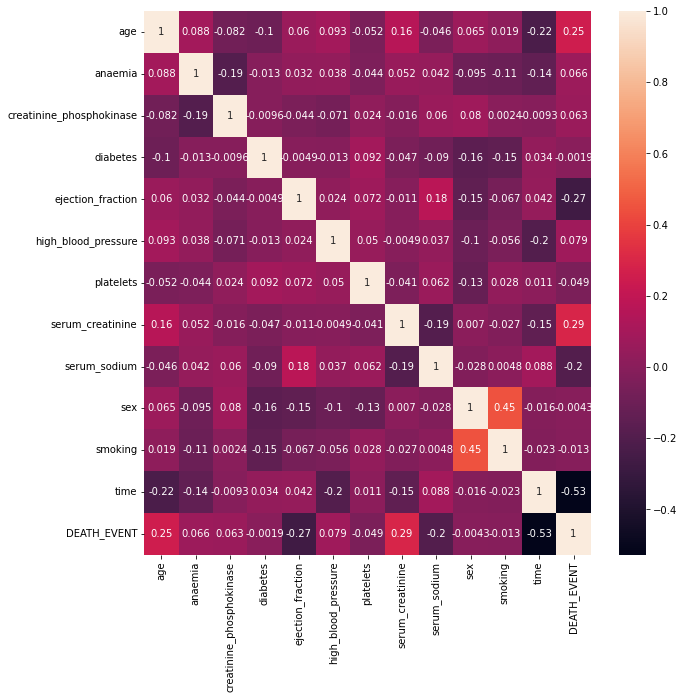

In [13]:
plt.figure(figsize=[10,10])
sns.heatmap(data=heart_df.corr(),annot=True)
plt.show()

To see if data is well balanced

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

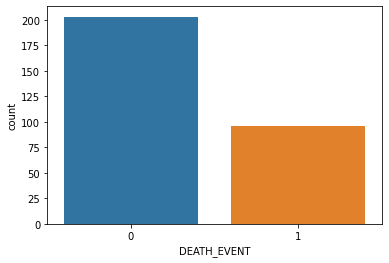

In [14]:
sns.countplot(x="DEATH_EVENT",data=heart_df)

# Building a model

we can see that data is imbalanced we have to take into consideration while splitting of the data

importing libraries for model creation

In [15]:
from sklearn.preprocessing import StandardScaler # for the feature engineering
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

#classification libraries

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

Seperating the target and dependent variable

In [16]:
X = heart_df.drop(columns="DEATH_EVENT")

y = heart_df.DEATH_EVENT

## Splitting the data

lets check for the ratio

In [17]:
sum(y)/len(y)

0.3210702341137124

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=42,stratify=y)

print(f'Shape of the data:\n Shape of X_train = {X_train.shape}, Shape of X_test = {X_test.shape},\n Shape of y_train = {y_train.shape}, Shape of y_test = {y_test.shape}')

Shape of the data:
 Shape of X_train = (254, 12), Shape of X_test = (45, 12),
 Shape of y_train = (254,), Shape of y_test = (45,)


Let's check the ratio again

In [19]:
sum(y_test)/len(y_test)

0.3111111111111111

In [20]:
sum(y_train)/len(y_train)

0.3228346456692913

Data is well distributed

## Feature Scalling

In [21]:
scale = StandardScaler(with_std=True)

X_scale_train = scale.fit_transform(X_train)

X_scale_test = scale.transform(X_test)

# KNN Classification

finding optimal neighbours

In [22]:
fin_score= 0
for i in range(1,255):
  model = KNeighborsClassifier(i)
  model.fit(X_scale_train,y_train)
  score = model.score(X_scale_test,y_test)

  if fin_score < score:
    fin_score = score
    neigh = i

print(f'Neighbours: {neigh}, best score:{fin_score}')

Neighbours: 1, best score:0.7555555555555555


# Decision Tree

In [23]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_scale_train,y_train)

print(f"Decision tree score : {dt_model.score(X_scale_test,y_test)}")


Decision tree score : 0.7333333333333333


In [24]:
print(f"Decision tree train score : {dt_model.score(X_scale_train,y_train)}")

Decision tree train score : 1.0


# Random Forest Classifier

In [25]:
def optimal_trees(Xtrain,Xtest,ytrain, ytest,trees):
    score_df = pd.DataFrame(columns=["trees","score","train_score"])
    for estimator in trees:
        rf_model = RandomForestClassifier(n_estimators=estimator,random_state=42)
        rf_model.fit(Xtrain,ytrain)
        score_df = score_df.append({"trees":estimator,"score":rf_model.score(Xtest,ytest),"train_score":rf_model.score(Xtrain,ytrain)},ignore_index=True)
        print ("+",end="")
    print("Complete")
    return score_df

In [26]:
trees = [100,200,300,400,500,600,700, 800,900,1000]

df = optimal_trees(X_scale_train,X_scale_test,y_train,y_test,trees)

++++++++++Complete


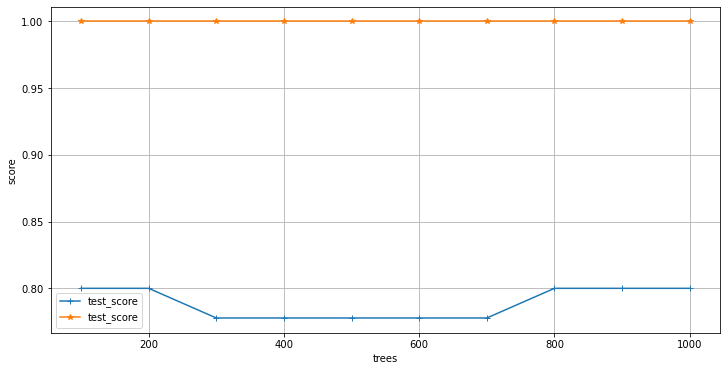

In [27]:
plt.figure(figsize=[12,6])
plt.plot(df.trees,df.score,marker='+',label="test_score")
plt.plot(df.trees,df.train_score,marker='*',label="test_score")
plt.xlabel("trees")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()

Lets try with iteration of 50

+++++++++++++++++++Complete


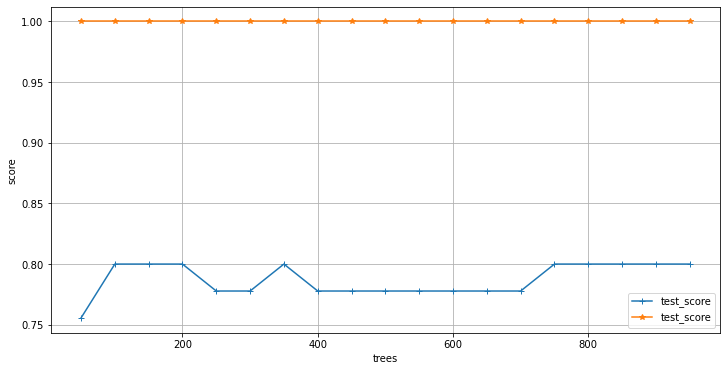

In [28]:
df = optimal_trees(X_scale_train,X_scale_test,y_train,y_test,range(50,1000,50))

plt.figure(figsize=[12,6])
plt.plot(df.trees,df.score,marker='+',label="test_score")
plt.plot(df.trees,df.train_score,marker='*',label="test_score")
plt.xlabel("trees")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()

100 seems to be optimum estimator for the Random forest algoritm 

Making Random forest model with 100 n_estimators

In [29]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_scale_train,y_train)
print("Score of the Random Forest classifier: ",rf_model.score(X_scale_test,y_test))

Score of the Random Forest classifier:  0.8


In [30]:
print(f"Random Forest train score : {rf_model.score(X_scale_train,y_train)}")

Random Forest train score : 1.0


# Gradient Boosting Classifier

Selecting hyper parameters

In [31]:
def gb_optimal_trees(Xtrain,Xtest,ytrain, ytest,trees):
    score_df = pd.DataFrame(columns=["trees","score","train_score"])
    for estimator in trees:
        gb_model = GradientBoostingClassifier(n_estimators=estimator,random_state=42)
        gb_model.fit(Xtrain,ytrain)
        score_df = score_df.append({"trees":estimator,"score":gb_model.score(Xtest,ytest),"train_score":gb_model.score(Xtrain,ytrain)},ignore_index=True)
        print ("+",end="")
    print("Complete")
    return score_df

In [32]:
df = gb_optimal_trees(X_scale_train,X_scale_test,y_train,y_test,range(50,1000,50))

+++++++++++++++++++Complete


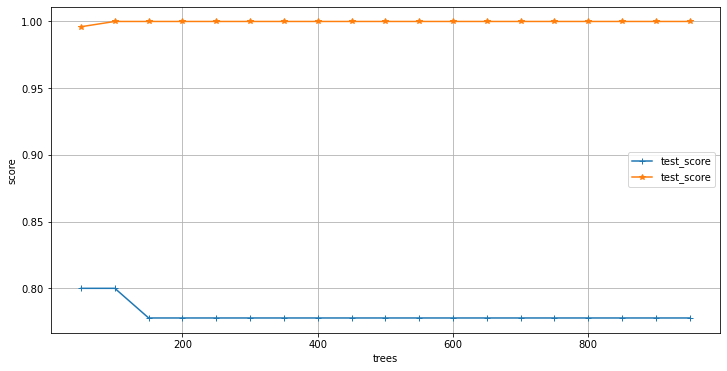

In [33]:
plt.figure(figsize=[12,6])
plt.plot(df.trees,df.score,marker='+',label="test_score")
plt.plot(df.trees,df.train_score,marker='*',label="test_score")
plt.xlabel("trees")
plt.ylabel("score")
plt.grid()
plt.legend()
plt.show()

Above figure shows 50 as optimum amount of estimator

Building a model with 50 estimators

In [34]:
lists = [50]

df = gb_optimal_trees(X_scale_train,X_scale_test,y_train,y_test,lists)

clear_output(wait=True)
print(f"Score of the gradient boosting classifier: {df.score[0]} \nScore of the gradient boosting classifier: {df.train_score[0]}")

Score of the gradient boosting classifier: 0.8 
Score of the gradient boosting classifier: 0.9960629921259843


# XGBClassifier model

In [35]:
def xg_optimal_estimator(Xtrain,Xtest,ytrain, ytest,trees):
    score_df = pd.DataFrame(columns=["trees","score","train_score"])
    for estimator in trees:
        xg_model = XGBClassifier(n_estimators=estimator,use_label_encoder=False,random_state=42)
        xg_model.fit(Xtrain,ytrain,eval_metric='aucpr')
        score_df = score_df.append({"trees":estimator,"score":xg_model.score(Xtest,ytest),"train_score":xg_model.score(Xtrain,ytrain)},ignore_index=True)
        print ("+",end="")
    print("Complete")
    return score_df

In [36]:
df = xg_optimal_estimator(X_scale_train,X_scale_test,y_train,y_test,range(50,1000,25))

++++++++++++++++++++++++++++++++++++++Complete


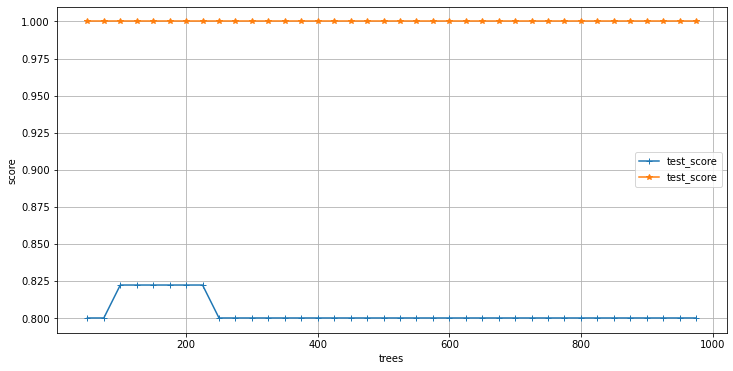

In [37]:
plt.figure(figsize=[12,6])
plt.plot(df.trees,df.score,marker='+',label="test_score")
plt.plot(df.trees,df.train_score,marker='*',label="test_score")
plt.xlabel("trees")
plt.ylabel("score")
plt.grid()
plt.legend()
plt.show()

In [38]:
xg_model = XGBClassifier(use_label_encoder=False,random_state=42,n_estimator=100)

xg_model.fit(X_scale_train,y_train,eval_metric='aucpr')

[21:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=100, n_estimators=100,
              n_jobs=2, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [39]:
xg_model.score(X_scale_test,y_test)

0.8222222222222222

# Adaboost

In [40]:
def ad_optimal_estimator(Xtrain,Xtest,ytrain, ytest,trees):
    score_df = pd.DataFrame(columns=["trees","score","train_score"])
    for estimator in trees:
        ad_model = AdaBoostClassifier(n_estimators=estimator,random_state=42)
        ad_model.fit(Xtrain,ytrain)
        score_df = score_df.append({"trees":estimator,"score":ad_model.score(Xtest,ytest),"train_score":ad_model.score(Xtrain,ytrain)},ignore_index=True)
        print ("+",end="")
    print("Complete")
    return score_df

In [41]:
df = ad_optimal_estimator(X_scale_train,X_scale_test,y_train,y_test,range(25,1000,25))

+++++++++++++++++++++++++++++++++++++++Complete


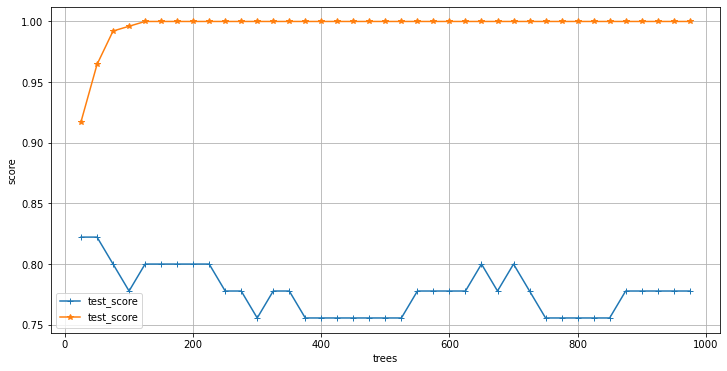

In [42]:
plt.figure(figsize=[12,6])
plt.plot(df.trees,df.score,marker='+',label="test_score")
plt.plot(df.trees,df.train_score,marker='*',label="test_score")
plt.xlabel("trees")
plt.ylabel("score")
plt.grid()
plt.legend()
plt.show()

Building with 50 estimators

In [43]:
ad_model = AdaBoostClassifier(n_estimators=50,random_state=42)

ad_model.fit(X_scale_train,y_train)

AdaBoostClassifier(random_state=42)

In [44]:
train_score = ad_model.score(X_scale_train,y_train)

test_score = ad_model.score(X_scale_test,y_test)

print(f"Score of the Adaboost classifier: {test_score} \nTraining Score of the Adaboost classifier: {train_score}")

Score of the Adaboost classifier: 0.8222222222222222 
Training Score of the Adaboost classifier: 0.9645669291338582


From all the build models we can clearly see Xg boosting algorithm and Adaboost algorithm gives us highest score of **82%** but we can select to go with the Adaboost algorithm with the found parameter as it prevents overfiting

Let's built the model with the found parameters with Adaboost

# Model Evaluation

### confusion matrix for the Adaboost

In [45]:
pred_y = ad_model.predict(X_scale_test)

In [46]:
confusion_matrix(y_test,pred_y)

array([[28,  3],
       [ 5,  9]], dtype=int64)

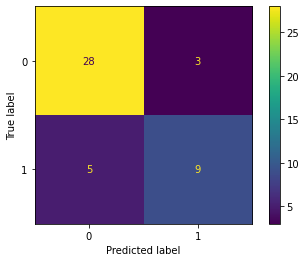

In [47]:
plot_confusion_matrix(estimator=ad_model,X=X_scale_test,y_true=y_test)

In [48]:
precision = 28/(28+3)
print(f"the precision of the model is: {precision}")

the precision of the model is: 0.9032258064516129


In [49]:
recall = 28/(28+5)
print(f"the recall of the model is: {recall}")

the recall of the model is: 0.8484848484848485


In [50]:
print("F1 score for the model: ",2*precision*recall/(precision+recall))

F1 score for the model:  0.875


### Scalling model

In [51]:
X_scale = scale.transform(X)

### Building Final model

In [52]:
final_model = ad_model.fit(X_scale,y)

print("Model created sucessfully")

Model created sucessfully


### Model is ready to deploy